In [1]:
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math

import swifter
import spacy
import ssl
from spacy import displacy
import pandas as pd
from spacy.lang.en import English
from spacy.pipeline import EntityRuler
from sklearn.metrics import accuracy_score
from spacy.matcher import Matcher
from spacy.pipeline import EntityRuler

from fuzzywuzzy import fuzz
from fuzzywuzzy import process
from fuzzywuzzy import process, fuzz

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
stop=set(stopwords.words('english'))
#nltk.download('stopwords')

from sklearn.linear_model import LogisticRegression

from joblib import Parallel, delayed

from tqdm import tqdm
tqdm.pandas()

import matplotlib.pyplot as plt

import seaborn as sns

import re

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing

from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split

global cls_acc
cls_acc = 0
global cls_time
cls_time = 0
import time
import io

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from IPython.display import display
from IPython.display import display

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

import seaborn as sns
from sklearn.metrics import confusion_matrix
from collections import Counter
from sklearn.model_selection import learning_curve

import matplotlib.pyplot as plt
import seaborn as sns

# EDA - Exploratory Data Anaysis
- Importing the original dataset
- Checking the number of rows and columns of the dataset
- Checking the total of null values per columns
- Checking the total of unique values per column

In [2]:
#df = pd.read_parquet('C:/Users/Olimpio.Dasilva/Desktop/MACHINE LEARNING/DATA/reporting_ncr_all_transactions_202302131044.parquet')
df = pd.read_csv('C:/Users/Olimpio.Dasilva/Desktop/random_sampling/reporting_ncr_all_transactions_202303081506.csv')
#df = pd.read_csv('C:/Users/Olimpio.Dasilva/Desktop/random_sampling/reporting_ncr_all_transactions_202303081406.csv')
pd.set_option('display.max_colwidth', None)
df = df.head(10000)
#df.head(5)

In [3]:
df.head(20)

,fi_id,account_id,transaction_id,amount,currency,txn_desc1,txn_desc2,region,transaction_timestamp,merchant_id,merchant_name,payment_agent,payment_agent_id,extract_date,filename,name
0,DI3712,Ab4d1019ff1df3d4c809e364ea485c11a,Tcd172d9363d63ef7b06f546fc1fbf88e,26.71,USD,WAWA 5243 CUTLER BAY,FLUS : POS Transaction,NaN,2022-10-03,13095.0,WAWA,Unknow Payment Agent,NaN,2022-10-05,FTS_CSLK_TRANSAC_20221004_100006.csv,Tropical Financial Credit Union
1,DI5211,Abc54790ce0d03cbfafc443ab1566a453,Td0ede472baa938b7bcbf300a354361b2,225.14,USD,VZWRLSS*BILL PAY VE 800-*4 CA C#6838,NaN,NaN,2022-12-20,13685.0,VERIZON WIRELESS,Unknow Payment Agent,NaN,2022-12-23,FTS_CSLK_TRANSAC_20221222_100006.csv,PEGASUS BANK
2,DI1041,A55a7ef98bd8637fb861dad0c7d131b62,T1180359a9f853ae2a6720fcea4f0ecda,51.63,USD,Withdrawal POS,AMAZON.COM*ZY1VH8OC3 SEATTLE WA,WA,2022-12-05,10127.0,AMAZON.COM,Unknow Payment Agent,NaN,2022-12-07,FTS_CSLK_TRANSAC_20221206_100006.csv,CLEARVIEW FEDERAL CREDIT UNION
3,DI3648,A02a710226b6a31bc8f0d00daa932c428,Tdcb8cb28b7013001a7066a59e169d294,12.92,USD,DBT PURCHASE ON 12/17 @ 18:22,Amazon.com*324CV8OM3 Amzn.com/bill WA CARD NBR: -3442,NaN,2022-12-18,10127.0,AMAZON.COM,Unknow Payment Agent,NaN,2022-12-21,FTS_CSLK_TRANSAC_20221220_100006.csv,Harborstone Credit Union
4,DI1533,Aeca8d5eb94e73ad69b6bab7b35f80eaf,Tc3a3ca3cbd73360a9d7b078a5d8a88bd,20.58,USD,DEBIT CARD DEBIT,auth #* 11-19-2022 7-ELEVEN 27335 ESSEX MD,MD,2022-11-20,10012.0,7 ELEVEN,Unknow Payment Agent,NaN,2022-11-22,FTS_CSLK_TRANSAC_20221121_100006.csv,Point Breeze Credit Union
5,DI1460,A984fe62c091b35688f90916b6d930a7b,T693b742c4fa833cda1bb6c055044454f,11.03,USD,Point Of Sale Withdrawal,CIRCLE K 00095 3113 HW HENDERSON KYUS,NaN,2022-12-02,10628.0,CIRCLE K,Unknow Payment Agent,NaN,2022-12-05,FTS_CSLK_TRANSAC_20221204_100012.csv,Evansville Teachers Fcu
6,DI3337,A49738d279a7e3a418a28e54f6baf3f01,Tcec5d4f3af6b324ea780bfeaf70271e4,29.94,USD,Withdrawal #**,ANTHEM ACE HDWE ANTHEM AZ,AZ,2022-06-17,10046.0,ACE HARDWARE,Unknow Payment Agent,NaN,2022-06-20,FTS_CSLK_TRANSAC_20220619_100012.csv,Arizona Federal Credit Union
7,DI3928,A4cbb4d16c2a436be81bf489f832c60a4,T121db0c848083890961d48303a947865,93.68,USD,Withdrawal SMARTPAY REWARDS,Location - CUMBERLAND F-451 GEYSER RD BALLSTON SPA NY / Terminal ID: 6847 TYPE: PREAUTHPMT ID: *3586 CO: SMARTPAY REWARDS %% ACH ECC POS %% ACH Trace **498,NaN,2022-07-22,10771.0,CUMBERLAND FARMS,Unknow Payment Agent,NaN,2022-07-25,FTS_CSLK_TRANSAC_20220724_100011.csv,First New York Federal Credit Union
8,DI3337,A5a8600a45b273d0481e0dd483d22ce2e,T42448b622faf3add94d80d0ae8bdfa55,17.14,USD,Withdrawal Debit Card,CHICK-FIL-A #03128 480-961-6006 AZ Date 04/02/22 ***75214 5814,NaN,2022-04-03,10597.0,CHICK-FIL-A,Unknow Payment Agent,NaN,2022-04-07,FTS_CSLK_TRANSAC_20220406_100001.csv,Arizona Federal Credit Union
9,DI1664,A376ef57bf00c37278a9a457754a14155,Ta68f33a1f5cb333588eadc8e11d08002,35.00,USD,Withdrawal KOHL'S,TYPE: CHG PYMT CO: KOHL'S NAME: FLOYD KELLEY,NaN,2022-08-02,11639.0,KOHL'S,Unknow Payment Agent,NaN,2022-08-05,FTS_CSLK_TRANSAC_20220804_100007.csv,REV Federal Credit Union


In [4]:
# Concatenating transaction descriptions columns
df["TRANSACTION_DETAILS"] = df['txn_desc1'].astype(str) +" %%%%% "+ df['txn_desc2'].astype(str)

In [5]:
df["LEN_WORDS"] = df["TRANSACTION_DETAILS"].apply(lambda x: len(str(x).split()))

In [6]:
df["LEN_WORDS"].describe()

count    10000.000000
mean        11.794300
std          4.137354
min          4.000000
25%          9.000000
50%         11.000000
75%         14.000000
max         36.000000
Name: LEN_WORDS, dtype: float64

In [7]:
print('Total number of rows and columns:', df.shape)

Total number of rows and columns: (10000, 18)


In [8]:
print('Total number of null values per column:')
df.isnull().sum()
#df.dropna(inplace=True)

Total number of null values per column:


fi_id                       0
account_id                  0
transaction_id              0
amount                      0
currency                    0
txn_desc1                   0
txn_desc2                 791
region                   8450
transaction_timestamp       0
merchant_id                 1
merchant_name               0
payment_agent               0
payment_agent_id         9490
extract_date                0
filename                    0
name                        0
TRANSACTION_DETAILS         0
LEN_WORDS                   0
dtype: int64

In [9]:
print('Total number of unique values per column:')
df.nunique()

Total number of unique values per column:


fi_id                      163
account_id                9146
transaction_id           10000
amount                    5235
currency                     1
txn_desc1                 3566
txn_desc2                 8406
region                      44
transaction_timestamp      510
merchant_id                658
merchant_name              660
payment_agent               14
payment_agent_id            21
extract_date               483
filename                   529
name                       163
TRANSACTION_DETAILS       9513
LEN_WORDS                   31
dtype: int64

# Unknown Merchant Names
- Selecting dataset with unknown merchants only
- Checking the number of rows and columns

In [10]:
df_unknown_merchs = df.copy(deep=True)
df_unknown_merchs = df_unknown_merchs[df["merchant_name"].str.contains("Unknow Merchant") == True]
print('Total number of rows and columns:', df_unknown_merchs.shape)

Total number of rows and columns: (0, 18)


# Known Merchant Names
- Selecting known merchants only 
- Checking the number of rows/transactions
- Checking the total number of merchants
- Checking the total number of occurrences per merchant
- Concatenated the transaction details columns
- Defined a function for word cloud for top merchants
- Defined a function for N-gram for top merchants with combined names
- Defined a function to check occurence of merchants in transaction columns

In [11]:
# Selecting only known merchants names from the original dataset
df_known_merchs = df[['transaction_id','txn_desc1','txn_desc2','payment_agent','merchant_name']].copy(deep=True)
df_known_merchs = df_known_merchs[df["merchant_name"].str.contains("Unknow Merchant") == False]
#######
df_known_merchs_cp2 = df[['transaction_id','txn_desc1','txn_desc2','payment_agent','merchant_name']].copy(deep=True)
df_known_merchs_cp2 = df_known_merchs_cp2[df["merchant_name"].str.contains("Unknow Merchant") == False]

#df_known_merchs = df_known_merchs.head(50)

In [12]:
findddd = df_known_merchs["txn_desc2"].str.contains("leopard latte salmon id", case=False)

In [13]:
print(findddd)

0       False
1         NaN
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: txn_desc2, Length: 10000, dtype: object


In [14]:
print('Number of transactions with known merchant names:\n',len(df_known_merchs) )

Number of transactions with known merchant names:
 10000


In [15]:
print('Total number of known merchants:\n',len(df_known_merchs.merchant_name.unique()))

Total number of known merchants:
 660


In [16]:
print('Total number of occurences per merchant name:\n',(df_known_merchs.merchant_name).value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

Total number of occurences per merchant name:
 AMAZON.COM          8.6%
WALMART             6.9%
MCDONALD'S          3.4%
APPLE STORE         3.2%
TARGET              2.2%
                    ... 
JOHNSTONE SUPPLY    0.0%
RITA'S              0.0%
COST CUTTERS        0.0%
ALASKA AIR          0.0%
JIFFY LUBE          0.0%
Name: merchant_name, Length: 660, dtype: object


In [17]:
# Concatenating transaction descriptions columns
df_known_merchs["TRANSACTION_DETAILS"] = df_known_merchs['txn_desc1'].astype(str) +" %%%%% "+ df_known_merchs['txn_desc2'].astype(str)

In [18]:
df_known_merchs.head(5)

,transaction_id,txn_desc1,txn_desc2,payment_agent,merchant_name,TRANSACTION_DETAILS
0,Tcd172d9363d63ef7b06f546fc1fbf88e,WAWA 5243 CUTLER BAY,FLUS : POS Transaction,Unknow Payment Agent,WAWA,WAWA 5243 CUTLER BAY %%%%% FLUS : POS Transaction
1,Td0ede472baa938b7bcbf300a354361b2,VZWRLSS*BILL PAY VE 800-*4 CA C#6838,NaN,Unknow Payment Agent,VERIZON WIRELESS,VZWRLSS*BILL PAY VE 800-*4 CA C#6838 %%%%% nan
2,T1180359a9f853ae2a6720fcea4f0ecda,Withdrawal POS,AMAZON.COM*ZY1VH8OC3 SEATTLE WA,Unknow Payment Agent,AMAZON.COM,Withdrawal POS %%%%% AMAZON.COM*ZY1VH8OC3 SEATTLE WA
3,Tdcb8cb28b7013001a7066a59e169d294,DBT PURCHASE ON 12/17 @ 18:22,Amazon.com*324CV8OM3 Amzn.com/bill WA CARD NBR: -3442,Unknow Payment Agent,AMAZON.COM,DBT PURCHASE ON 12/17 @ 18:22 %%%%% Amazon.com*324CV8OM3 Amzn.com/bill WA CARD NBR: -3442
4,Tc3a3ca3cbd73360a9d7b078a5d8a88bd,DEBIT CARD DEBIT,auth #* 11-19-2022 7-ELEVEN 27335 ESSEX MD,Unknow Payment Agent,7 ELEVEN,DEBIT CARD DEBIT %%%%% auth #* 11-19-2022 7-ELEVEN 27335 ESSEX MD


In [19]:
df_known_merchs["LEN_WORDS"] = df_known_merchs["TRANSACTION_DETAILS"].apply(lambda x: len(str(x).split()))


In [20]:
df_known_merchs["LEN_WORDS"].describe()

count    10000.000000
mean        11.794300
std          4.137354
min          4.000000
25%          9.000000
50%         11.000000
75%         14.000000
max         36.000000
Name: LEN_WORDS, dtype: float64

In [21]:
df_known_merchs["LEN_TOKENS"] = df_known_merchs["TRANSACTION_DETAILS"].apply(lambda x: len(str(x)) / 4)

In [22]:
df_known_merchs["LEN_TOKENS"].describe()

count    10000.000000
mean        18.035125
std          5.490699
min          5.250000
25%         14.000000
50%         17.250000
75%         21.250000
max         51.500000
Name: LEN_TOKENS, dtype: float64

In [23]:
df_known_merchs.head(5)

,transaction_id,txn_desc1,txn_desc2,payment_agent,merchant_name,TRANSACTION_DETAILS,LEN_WORDS,LEN_TOKENS
0,Tcd172d9363d63ef7b06f546fc1fbf88e,WAWA 5243 CUTLER BAY,FLUS : POS Transaction,Unknow Payment Agent,WAWA,WAWA 5243 CUTLER BAY %%%%% FLUS : POS Transaction,9,12.25
1,Td0ede472baa938b7bcbf300a354361b2,VZWRLSS*BILL PAY VE 800-*4 CA C#6838,NaN,Unknow Payment Agent,VERIZON WIRELESS,VZWRLSS*BILL PAY VE 800-*4 CA C#6838 %%%%% nan,8,11.50
2,T1180359a9f853ae2a6720fcea4f0ecda,Withdrawal POS,AMAZON.COM*ZY1VH8OC3 SEATTLE WA,Unknow Payment Agent,AMAZON.COM,Withdrawal POS %%%%% AMAZON.COM*ZY1VH8OC3 SEATTLE WA,6,13.00
3,Tdcb8cb28b7013001a7066a59e169d294,DBT PURCHASE ON 12/17 @ 18:22,Amazon.com*324CV8OM3 Amzn.com/bill WA CARD NBR: -3442,Unknow Payment Agent,AMAZON.COM,DBT PURCHASE ON 12/17 @ 18:22 %%%%% Amazon.com*324CV8OM3 Amzn.com/bill WA CARD NBR: -3442,13,22.25
4,Tc3a3ca3cbd73360a9d7b078a5d8a88bd,DEBIT CARD DEBIT,auth #* 11-19-2022 7-ELEVEN 27335 ESSEX MD,Unknow Payment Agent,7 ELEVEN,DEBIT CARD DEBIT %%%%% auth #* 11-19-2022 7-ELEVEN 27335 ESSEX MD,11,16.25


In [24]:
def word_cloud(a):
    # Word cloud for more frequent merchant names
    text = " ".join(i for i in a)
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
    plt.figure( figsize=(7,7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [25]:
# Copy of the afs merchant names column
df_known_merchs['AFS_PAYMENT_AGENTS'] = df_known_merchs['payment_agent'] 
# Copy of the afs merchant names column
df_known_merchs['AFS_MECHANT_NAMES'] = df_known_merchs['merchant_name']
# Droping original cols
df_known_merchs = df_known_merchs.drop(['txn_desc1', 'txn_desc2','payment_agent','merchant_name'], axis=1)

# Word cloud for more frequent merchant names
#word_cloud(df_known_merchs.AFS_MECHANT_NAMES)

In [26]:
df_known_merchs

,transaction_id,TRANSACTION_DETAILS,LEN_WORDS,LEN_TOKENS,AFS_PAYMENT_AGENTS,AFS_MECHANT_NAMES
0,Tcd172d9363d63ef7b06f546fc1fbf88e,WAWA 5243 CUTLER BAY %%%%% FLUS : POS Transaction,9,12.25,Unknow Payment Agent,WAWA
1,Td0ede472baa938b7bcbf300a354361b2,VZWRLSS*BILL PAY VE 800-*4 CA C#6838 %%%%% nan,8,11.50,Unknow Payment Agent,VERIZON WIRELESS
2,T1180359a9f853ae2a6720fcea4f0ecda,Withdrawal POS %%%%% AMAZON.COM*ZY1VH8OC3 SEATTLE WA,6,13.00,Unknow Payment Agent,AMAZON.COM
3,Tdcb8cb28b7013001a7066a59e169d294,DBT PURCHASE ON 12/17 @ 18:22 %%%%% Amazon.com*324CV8OM3 Amzn.com/bill WA CARD NBR: -3442,13,22.25,Unknow Payment Agent,AMAZON.COM
4,Tc3a3ca3cbd73360a9d7b078a5d8a88bd,DEBIT CARD DEBIT %%%%% auth #* 11-19-2022 7-ELEVEN 27335 ESSEX MD,11,16.25,Unknow Payment Agent,7 ELEVEN
...,...,...,...,...,...,...
9995,T846eefe1cebb352a9ee12f1bf395d4ce,Debit Card %%%%% AMZN Mktp US*5R5G82FA3 Amzn.com/bill WA Date 01/16/23 ***31220 5942,12,21.00,Unknow Payment Agent,AMAZON.COM
9996,T7e31ed22394535a7b420efd8ea396da0,Descriptive Withdrawal BILL PAY %%%%% Citi Card,7,11.75,Unknow Payment Agent,CITIGROUP
9997,Td176838c1d0d3e53b178e7ca36278764,Withdrawal Consumer Debit %%%%% DUNKIN #* 72 W MAIN STREET *6637 Date 07/13/22 0 *626 0 5814 %% Card 15 #*9028,21,27.50,Unknow Payment Agent,DUNKIN' DONUTS
9998,T2770d6f2d57a3a228638ee78af7dba63,Withdrawal Instant Issue %%%%% COSTCO WHSE #0671 HAWTHORNE CA Date 11/23/21 0 *7637 0 5300 %% Card 10 #2400,19,26.75,Unknow Payment Agent,COSTCO


In [27]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

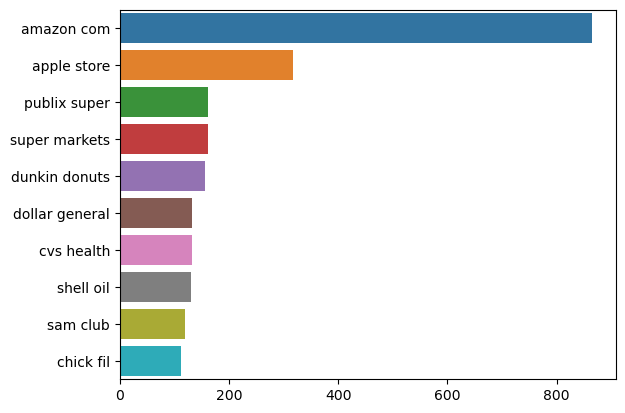

In [28]:
top_n_bigrams=get_top_ngram(df_known_merchs['AFS_MECHANT_NAMES'],2)[:10] 
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x);

In [29]:
def check_names(merchant, t_details):
    
    # Variations for merchant name column
    merchant_1 = merchant
    merchant_2 = merchant_1.lower()
    merchant_3 = re.sub("[\\\\/:*?'#<>|-]", '', merchant_2)
    merchant_4 = re.sub(' ', '', merchant_2)
    merchant_5 = re.sub('[.com/%]', ' ', merchant_2)
    merch_list = merchant_1.split() + merchant_2.split() + merchant_3.split() + merchant_4.split() + merchant_5.split() + merchant.split()
    
    # Variations for transaction details column
    t_details_1 = t_details
    t_details_2 = t_details.lower()
    t_details_3 = re.sub("[\\\\/:*?'#<>|-]", '', t_details_2)
    t_details_4 = re.sub("[.com/%]", " ",t_details_2)
    t_details_5 = re.sub("[\\\\/:*?'#<>|-]", ' ', t_details_2)
    date_pattern = re.sub("\d{1,2}/\d{1,2}(/\d{2,4})?", "", t_details_2)
    
    # Merchants mentioned in transaction description w/ variations
    comp_1 = re.sub("Prime", "AMAZONVOD",t_details_1)
    comp_2 = re.sub("VZWRLSS", "VERIZON WIRELESS",t_details_1)
    comp_3 = re.sub("WM", "WALMART",t_details_1)
    
    #################################
    
    #################################
    
    # Creating a list of conversions to check if merchants are mentioned in transation descriotions 
    details_lis = t_details_2.split()
    details_lis_1 = t_details_1.split() + t_details_2.split() + t_details_3.split() + details_lis + t_details_4.split() + t_details_5.split() + comp_1.split() + comp_2.split() + comp_3.split() + t_details.split() + date_pattern.split()
    
    # Conditions to check if words are in transaction strings
    if (merchant in t_details_3 or t_details_3 in merchant or           #VEEEEEERRRR  merchant in t_details_3 or t_details_3 in merchant or 
        (merchant_2 in t_details_3 or t_details_3 in merchant_2) or 
        (merchant_3 in t_details_3 or t_details_3 in merchant_3) or
        (merchant_4 in t_details_3 or t_details_3 in merchant_4) or
        (merchant_1 in t_details_3 or t_details_1 in merchant_4) or
        (merchant_1 in details_lis_1 or merchant_4 in details_lis)or
        (any(item in merch_list for item in details_lis_1)) or
        (merchant_1[:4] in t_details_1)):
        return True
    else:
        return False
    

- Checked the occurrence of merchants in the first and secod transation colums separately
- Checked the total number of occurrences per column

In [30]:
# Merchants in the txt_1 or txt_2 columns
df_known_merchs_cp2['txn_desc2'] = df_known_merchs_cp2['txn_desc2'].astype(str)
df_known_merchs_cp2['txn_desc1'] = df_known_merchs_cp2['txn_desc1'].astype(str)
df_known_merchs_cp2['merchant_name'] = df_known_merchs_cp2['merchant_name'].astype(str)
df_known_merchs_cp2['CHECK_MERCH_TRA_cp'] = df_known_merchs_cp2.apply(lambda x: check_names(x.merchant_name, x.txn_desc1), axis=1) # OR txn_desc2
df_known_merchs_cp2.head(5)

,transaction_id,txn_desc1,txn_desc2,payment_agent,merchant_name,CHECK_MERCH_TRA_cp
0,Tcd172d9363d63ef7b06f546fc1fbf88e,WAWA 5243 CUTLER BAY,FLUS : POS Transaction,Unknow Payment Agent,WAWA,True
1,Td0ede472baa938b7bcbf300a354361b2,VZWRLSS*BILL PAY VE 800-*4 CA C#6838,nan,Unknow Payment Agent,VERIZON WIRELESS,True
2,T1180359a9f853ae2a6720fcea4f0ecda,Withdrawal POS,AMAZON.COM*ZY1VH8OC3 SEATTLE WA,Unknow Payment Agent,AMAZON.COM,False
3,Tdcb8cb28b7013001a7066a59e169d294,DBT PURCHASE ON 12/17 @ 18:22,Amazon.com*324CV8OM3 Amzn.com/bill WA CARD NBR: -3442,Unknow Payment Agent,AMAZON.COM,True
4,Tc3a3ca3cbd73360a9d7b078a5d8a88bd,DEBIT CARD DEBIT,auth #* 11-19-2022 7-ELEVEN 27335 ESSEX MD,Unknow Payment Agent,7 ELEVEN,False


In [31]:
print('Total of transactions with known merchants:\n',len(df_known_merchs_cp2))

Total of transactions with known merchants:
 10000


In [32]:
print('Merchant name occurrence in txn_desc1 column:\n',(df_known_merchs_cp2['CHECK_MERCH_TRA_cp'] == True).sum())

Merchant name occurrence in txn_desc1 column:
 4208


In [33]:
df_known_merchs_cp2['CHECK_MERCH_TRA_cp'] = df_known_merchs_cp2.apply(lambda x: check_names(x.merchant_name, x.txn_desc2), axis=1)
print('Merchant name occurrence in txn_desc2 column:\n',(df_known_merchs_cp2['CHECK_MERCH_TRA_cp'] == True).sum())

Merchant name occurrence in txn_desc2 column:
 7027


- Checked occurrence of merchants in concatenated transaction column
- Created CHECK_MERCH_TRA to inspect occurrences
- Checked total number of occurences in merchant details coolumn

In [34]:
# Checking if merchant names are mentioned in the transaction description
df_known_merchs['CHECK_MERCH_TRA'] = df_known_merchs.apply(lambda x: check_names(x.AFS_MECHANT_NAMES, x.TRANSACTION_DETAILS), axis=1)
df_known_merchs.head(5)

,transaction_id,TRANSACTION_DETAILS,LEN_WORDS,LEN_TOKENS,AFS_PAYMENT_AGENTS,AFS_MECHANT_NAMES,CHECK_MERCH_TRA
0,Tcd172d9363d63ef7b06f546fc1fbf88e,WAWA 5243 CUTLER BAY %%%%% FLUS : POS Transaction,9,12.25,Unknow Payment Agent,WAWA,True
1,Td0ede472baa938b7bcbf300a354361b2,VZWRLSS*BILL PAY VE 800-*4 CA C#6838 %%%%% nan,8,11.50,Unknow Payment Agent,VERIZON WIRELESS,True
2,T1180359a9f853ae2a6720fcea4f0ecda,Withdrawal POS %%%%% AMAZON.COM*ZY1VH8OC3 SEATTLE WA,6,13.00,Unknow Payment Agent,AMAZON.COM,True
3,Tdcb8cb28b7013001a7066a59e169d294,DBT PURCHASE ON 12/17 @ 18:22 %%%%% Amazon.com*324CV8OM3 Amzn.com/bill WA CARD NBR: -3442,13,22.25,Unknow Payment Agent,AMAZON.COM,True
4,Tc3a3ca3cbd73360a9d7b078a5d8a88bd,DEBIT CARD DEBIT %%%%% auth #* 11-19-2022 7-ELEVEN 27335 ESSEX MD,11,16.25,Unknow Payment Agent,7 ELEVEN,True


In [35]:
# Merchant name in the transaction description
print('Merchant name in the transaction description:\n',(df_known_merchs['CHECK_MERCH_TRA'] == True).sum() )

Merchant name in the transaction description:
 9863


- Created a copy to encode CHECK_MERCH_TRA results
- Created a chart to compare the results
- Created a word cloud of AFS_MECHANT_NAMES to get most frequen merchants
- Checked how many times merchants are mentioned in transaction details
- Checked how many times merchants are not in transaction details
- Created word cloud for merchants not in transaction details 

In [36]:
df_known_merchs_cp = df_known_merchs[['transaction_id','TRANSACTION_DETAILS','AFS_PAYMENT_AGENTS','AFS_MECHANT_NAMES','CHECK_MERCH_TRA']].copy(deep=True)
df_known_merchs_cp.head()

,transaction_id,TRANSACTION_DETAILS,AFS_PAYMENT_AGENTS,AFS_MECHANT_NAMES,CHECK_MERCH_TRA
0,Tcd172d9363d63ef7b06f546fc1fbf88e,WAWA 5243 CUTLER BAY %%%%% FLUS : POS Transaction,Unknow Payment Agent,WAWA,True
1,Td0ede472baa938b7bcbf300a354361b2,VZWRLSS*BILL PAY VE 800-*4 CA C#6838 %%%%% nan,Unknow Payment Agent,VERIZON WIRELESS,True
2,T1180359a9f853ae2a6720fcea4f0ecda,Withdrawal POS %%%%% AMAZON.COM*ZY1VH8OC3 SEATTLE WA,Unknow Payment Agent,AMAZON.COM,True
3,Tdcb8cb28b7013001a7066a59e169d294,DBT PURCHASE ON 12/17 @ 18:22 %%%%% Amazon.com*324CV8OM3 Amzn.com/bill WA CARD NBR: -3442,Unknow Payment Agent,AMAZON.COM,True
4,Tc3a3ca3cbd73360a9d7b078a5d8a88bd,DEBIT CARD DEBIT %%%%% auth #* 11-19-2022 7-ELEVEN 27335 ESSEX MD,Unknow Payment Agent,7 ELEVEN,True


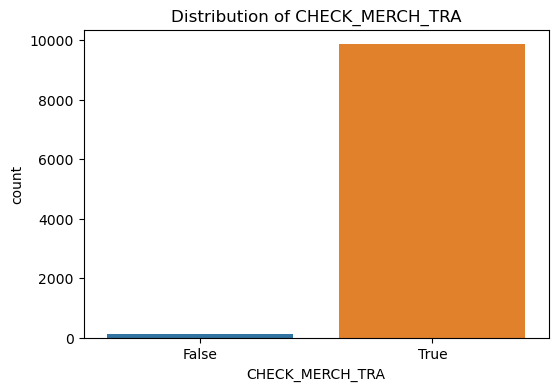

In [37]:
plt.figure(figsize=(6, 4))
sns.countplot(x="CHECK_MERCH_TRA", data=df_known_merchs_cp)
plt.title("Distribution of CHECK_MERCH_TRA");

In [38]:
print('Percentage of merchant names in T details or not (1/0):\n',(df_known_merchs_cp.CHECK_MERCH_TRA).value_counts(normalize=True).mul(100).round(1).astype(str) + '%');

Percentage of merchant names in T details or not (1/0):
 True     98.6%
False     1.4%
Name: CHECK_MERCH_TRA, dtype: object


In [39]:
# Number of merchant names in transaction details
df_check_true = pd.DataFrame()
df_check_true = df_known_merchs.loc[df_known_merchs['CHECK_MERCH_TRA'] == True]
print('Number of merchant names in transaction details:\n',len(df_check_true))

Number of merchant names in transaction details:
 9863


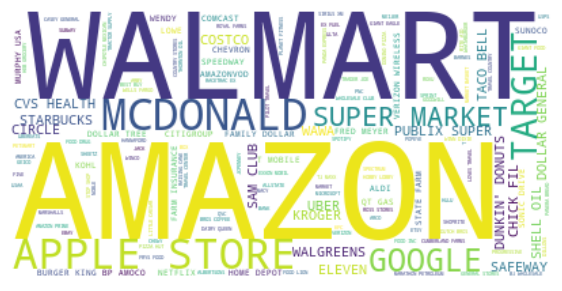

In [40]:
# Word cloud for more frequent merchant names WHEN merchant name is in transaction description

word_cloud(df_check_true.AFS_MECHANT_NAMES)

In [41]:
print('Total number of occurences per merchant name:\n',(df_check_true.AFS_MECHANT_NAMES).value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

Total number of occurences per merchant name:
 AMAZON.COM                   8.6%
WALMART                      7.0%
MCDONALD'S                   3.5%
APPLE STORE                  3.2%
TARGET                       2.2%
                             ... 
COST CUTTERS                 0.0%
ALASKA AIR                   0.0%
GRAND SLAM                   0.0%
ELECTRONIC ARTS - DIGITAL    0.0%
JIFFY LUBE                   0.0%
Name: AFS_MECHANT_NAMES, Length: 653, dtype: object


In [42]:
print('Number of merchant names NOT in the transaction description:\n',(df_known_merchs['CHECK_MERCH_TRA'] == False).sum())

Number of merchant names NOT in the transaction description:
 137


In [43]:
# Number of merchant names not in transaction details
df_check_false = pd.DataFrame()
df_check_false = df_known_merchs.loc[df_known_merchs['CHECK_MERCH_TRA'] == False]
#print('Number of merchant names NOT in the transaction description:\n', len(df_check_false))

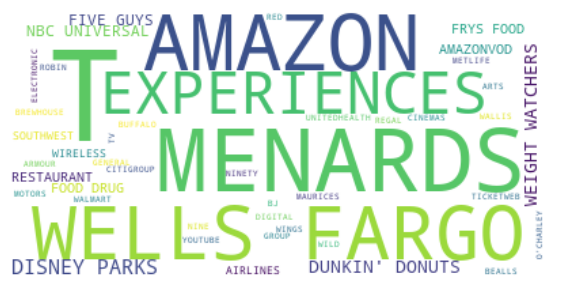

In [44]:
# Word cloud for more frequent merchant names WHEN merchant name is NOT in transaction description
word_cloud(df_check_false.AFS_MECHANT_NAMES)

In [45]:
print('Total number of occurences per merchant name WHEN merchant name is NOT in transation details:\n', (df_check_false.AFS_MECHANT_NAMES).value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

Total number of occurences per merchant name WHEN merchant name is NOT in transation details:
 AT&T                            28.5%
MENARDS                         12.4%
AMAZON.COM                       9.5%
WELLS FARGO                      8.8%
DISNEY PARKS AND EXPERIENCES     5.8%
WEIGHT WATCHERS                  4.4%
DUNKIN' DONUTS                   4.4%
FIVE GUYS                        2.9%
NBC UNIVERSAL                    2.9%
FRYS FOOD & DRUG                 2.2%
AMAZONVOD                        2.2%
AT&T WIRELESS                    1.5%
SOUTHWEST AIRLINES               1.5%
RED ROBIN RESTAURANTS            0.7%
BEALLS                           0.7%
METLIFE                          0.7%
UNITEDHEALTH GROUP               0.7%
NINETY NINE RESTAURANTS          0.7%
UNDER ARMOUR                     0.7%
BUFFALO WILD WINGS               0.7%
TICKETWEB                        0.7%
REGAL CINEMAS                    0.7%
WALLIS                           0.7%
YOUTUBE TV                     

- Merchant names not mentioned in transaction description

In [46]:
# Merchant names not mentioned in transaction description
df_known_merchs.loc[df_known_merchs['CHECK_MERCH_TRA']==False] 


,transaction_id,TRANSACTION_DETAILS,LEN_WORDS,LEN_TOKENS,AFS_PAYMENT_AGENTS,AFS_MECHANT_NAMES,CHECK_MERCH_TRA
159,T83340bdc0beb398794663d568a495f6f,ACH Withdrawal %%%%% WF HOME MTG AUTO PAY,8,10.25,Unknow Payment Agent,WELLS FARGO,False
190,Tee6230e47e0c3bb194d8a93b81b6f5ea,POS Withdrawal (FIS) Kindle %%%%% Unltd*4B Kindle Unltd*4B73I5 866-321-8851 WA(2121),10,21.00,Unknow Payment Agent,AMAZON.COM,False
229,Ta99734d8bf2b349483b541a45cb758b3,MNRD-TIPP CITY 75 W TIPP CITY %%%%% OHUS : POS Transaction REF:***51424 PUR DATE:*21,14,21.00,Unknow Payment Agent,MENARDS,False
526,T301347367c4d3372bd115301c7107dfe,External Withdrawal ATT - %%%%% Payment,6,9.75,Unknow Payment Agent,AT&T,False
605,Td246fdc6ab293ed38f210c4ab776eff3,Withdrawal EMV DEBIT CARD %%%%% ATT* BILL PAYMENT 800-331-0500 TX Date 01/28/23 ***78006 4814,14,23.25,Unknow Payment Agent,AT&T,False
...,...,...,...,...,...,...,...
9823,Tcae864fc010c31a99e103a7e2b59250d,ELECTRONIC WITHDRAWAL %%%%% ATT PAYMENT *,6,10.25,Unknow Payment Agent,AT&T,False
9834,T57cedefb743c3d21aad51d7553ebd8db,Purchase MNRD-LAWRENCE 1470 %%%%% WESTLAWRENCE KSUS,6,12.75,Unknow Payment Agent,MENARDS,False
9911,T02594d3159ac3720987264d9f947b449,Withdrawal #* %%%%% MNRD-TRIADELPHI 700 CABELA DR TRIADELPHIA WV %% Card 19 #7897,13,20.25,Unknow Payment Agent,MENARDS,False
9933,T09e7df25d6a436bdb1c0e6c83138fb26,POS Transaction %%%%% 5GUYS 1667 QSR 5331 S CTUCSON AZUS,10,14.00,Unknow Payment Agent,FIVE GUYS,False


# Named Entity Recognition
- Created a copy of df_known_merchs for predictions purposes - "df_known_merchs_pred"
- Created the PREDICTIONS column
- Used NER from Spacy
- Applied Entity Ruler to add all the merchants (PATTERNS) from AFS into the model
- Defined function to find patterns from AFS predictions - "def_patterns"
- Defined function to find the organisations in the Transaction details column - "find_org"
- Defined funtion to implement parallel processing = "find_org_parallel"
- Implemented cust NER model and displayed the results

In [47]:
df_known_merchs_pred = df_known_merchs.copy(deep=True)
df_known_merchs_pred['AFS_MECHANT_NAMES'] = df_known_merchs_pred['AFS_MECHANT_NAMES'].str.lower()
df_known_merchs_pred['TRANSACTION_DETAILS']= df_known_merchs_pred['TRANSACTION_DETAILS'].str.lower().str.replace(r'\s{2,}','').str.replace(r"[,;@#?!&$*]+\ *", " ")

In [48]:
df_known_merchs_pred.head(10)

,transaction_id,TRANSACTION_DETAILS,LEN_WORDS,LEN_TOKENS,AFS_PAYMENT_AGENTS,AFS_MECHANT_NAMES,CHECK_MERCH_TRA
0,Tcd172d9363d63ef7b06f546fc1fbf88e,wawa 5243 cutler bay %%%%% flus : pos transaction,9,12.25,Unknow Payment Agent,wawa,True
1,Td0ede472baa938b7bcbf300a354361b2,vzwrlss bill pay ve 800- 4 ca c 6838 %%%%% nan,8,11.50,Unknow Payment Agent,verizon wireless,True
2,T1180359a9f853ae2a6720fcea4f0ecda,withdrawal pos %%%%% amazon.com zy1vh8oc3 seattle wa,6,13.00,Unknow Payment Agent,amazon.com,True
3,Tdcb8cb28b7013001a7066a59e169d294,dbt purchase on 12/17 18:22 %%%%% amazon.com 324cv8om3 amzn.com/bill wa card nbr: -3442,13,22.25,Unknow Payment Agent,amazon.com,True
4,Tc3a3ca3cbd73360a9d7b078a5d8a88bd,debit card debit %%%%% auth 11-19-2022 7-eleven 27335 essex md,11,16.25,Unknow Payment Agent,7 eleven,True
5,T693b742c4fa833cda1bb6c055044454f,point of sale withdrawal %%%%% circle k 00095 3113 hw henderson kyus,12,17.00,Unknow Payment Agent,circle k,True
6,Tcec5d4f3af6b324ea780bfeaf70271e4,withdrawal %%%%% anthem ace hdwe anthem az,8,11.50,Unknow Payment Agent,ace hardware,True
7,T121db0c848083890961d48303a947865,withdrawal smartpay rewards %%%%% location - cumberland f-451 geyser rd ballston spa ny / terminal id: 6847 type: preauthpmt id: 3586 co: smartpay rewards %% ach ecc pos %% ach trace 498,32,47.25,Unknow Payment Agent,cumberland farms,True
8,T42448b622faf3add94d80d0ae8bdfa55,withdrawal debit card %%%%% chick-fil-a 03128 480-961-6006 az date 04/02/22 75214 5814,12,22.50,Unknow Payment Agent,chick-fil-a,True
9,Ta68f33a1f5cb333588eadc8e11d08002,withdrawal kohl's %%%%% type: chg pymt co: kohl's name: floyd kelley,11,17.00,Unknow Payment Agent,kohl's,True


- Function to find and create a list of patterns

In [49]:
def def_patterns(a):

    #Creating a list of patterns - with all the merchant names (with and without spaces, quotes, .com, etc.)

    org =  a #df_known_payment_agents['AFS_MECHANT_NAMES']

    #List of Entities and Patterns
    org_list = org.tolist()

    a = [ x.strip() for x in org_list] # list comprehension - all merchant names from original org_list
    a_space =list(filter(lambda x: ' ' in x, a)) # filtering all names w spaces
    a_nospace = [x.replace(' ', '') for x in a_space] # replacing spaces w ''

    a_quo =list(filter(lambda x: "'" in x, a)) # filtering all names w quotes
    a_noquuo = [x.replace("'", '') for x in a_quo] # replacing quotes w ''

    a_com =list(filter(lambda x: '.com' in x, a)) # filtering all names w .com
    a_nocom = [x.replace('.com', '') for x in a_com] # replacing .com w ''

    a_dash =list(filter(lambda x: '-' in x, a)) # filtering all names w dash
    a_nodash = [x.replace('-', '') for x in a_com] # replacing dash w ''

    new_lis = a + a_nospace + a_nocom + a_noquuo + a_nodash # add instead of dis_list


    # Creating a list of patterns with all the variations from new_lis
    patterns = []
    i = 0
    new_lis = tuple(new_lis)
    for item in new_lis:
        patterns.append({"label": 'ORG', "pattern": [{"LOWER":item}]})
        # patterns.append({"label": 'ORG', "pattern": new_lis[i]})
        i+=1

    # #print(patterns)
    #patterns.append(listb)
    #print(patterns)


    return patterns

In [50]:
patterns = def_patterns(df_known_merchs_pred['AFS_MECHANT_NAMES'])

- Function to find organisations using patterns

In [51]:
# Function to find merchant names in a string - using an NER model with the previously created patterns

def find_org(text:str):
    
    #Build upon the spaCy Model
    NER2 = spacy.load("en_core_web_sm")
    
    #Create the EntityRuler
    ruler = NER2.add_pipe("entity_ruler", config={'validate': True})
     
    ruler.add_patterns(patterns)
    doc_ner = NER2(text)
    
    # useless strings
    junk = ['fip', 'ca(2810','fis','xx4386', '#185','*','hr0d','k50ms3hv','xx9510','xx4710','xx4706','xx0322','he34i8pz0','xx3840','pd1387','ma(9661','ns4qa9xb3 ']
    
    #extract entities
    orgs = []
    for ent in doc_ner.ents:
        if ((ent.label_ == "ORG") and (ent.text not in junk)):
            orgs.append(ent.text)
    orgs = list(set(orgs))
    return ' '.join(orgs) if orgs else 'NA'

- Function for parallel processing

In [52]:
def find_org_parallel(a:dict):
    i=a.copy()
    print(i)
    result = find_org(i['TRANSACTION_DETAILS'])
    i['PREDICTIONS']= result
    print(i)
    return i

In [53]:
df_known_merchs_pred.head(5)

,transaction_id,TRANSACTION_DETAILS,LEN_WORDS,LEN_TOKENS,AFS_PAYMENT_AGENTS,AFS_MECHANT_NAMES,CHECK_MERCH_TRA
0,Tcd172d9363d63ef7b06f546fc1fbf88e,wawa 5243 cutler bay %%%%% flus : pos transaction,9,12.25,Unknow Payment Agent,wawa,True
1,Td0ede472baa938b7bcbf300a354361b2,vzwrlss bill pay ve 800- 4 ca c 6838 %%%%% nan,8,11.50,Unknow Payment Agent,verizon wireless,True
2,T1180359a9f853ae2a6720fcea4f0ecda,withdrawal pos %%%%% amazon.com zy1vh8oc3 seattle wa,6,13.00,Unknow Payment Agent,amazon.com,True
3,Tdcb8cb28b7013001a7066a59e169d294,dbt purchase on 12/17 18:22 %%%%% amazon.com 324cv8om3 amzn.com/bill wa card nbr: -3442,13,22.25,Unknow Payment Agent,amazon.com,True
4,Tc3a3ca3cbd73360a9d7b078a5d8a88bd,debit card debit %%%%% auth 11-19-2022 7-eleven 27335 essex md,11,16.25,Unknow Payment Agent,7 eleven,True


In [54]:
t_list = df_known_merchs_pred[['transaction_id', 'TRANSACTION_DETAILS', 'AFS_MECHANT_NAMES', 'CHECK_MERCH_TRA']].copy(deep=True).to_dict(orient='records') #replace similarity w unique ID

In [55]:
# df_known_merchs_pred['PREDICTIONS'] = df_known_merchs_pred.TRANSACTION_DETAILS.swifter.apply(find_org)

In [56]:
#par = Parallel(n_jobs=-1)(delayed(find_org_parallel)(i) for i in tqdm(t_list))

In [57]:
#df_known_merchs_pred = pd.DataFrame(par)

In [58]:
df_known_merchs_pred

,transaction_id,TRANSACTION_DETAILS,LEN_WORDS,LEN_TOKENS,AFS_PAYMENT_AGENTS,AFS_MECHANT_NAMES,CHECK_MERCH_TRA
0,Tcd172d9363d63ef7b06f546fc1fbf88e,wawa 5243 cutler bay %%%%% flus : pos transaction,9,12.25,Unknow Payment Agent,wawa,True
1,Td0ede472baa938b7bcbf300a354361b2,vzwrlss bill pay ve 800- 4 ca c 6838 %%%%% nan,8,11.50,Unknow Payment Agent,verizon wireless,True
2,T1180359a9f853ae2a6720fcea4f0ecda,withdrawal pos %%%%% amazon.com zy1vh8oc3 seattle wa,6,13.00,Unknow Payment Agent,amazon.com,True
3,Tdcb8cb28b7013001a7066a59e169d294,dbt purchase on 12/17 18:22 %%%%% amazon.com 324cv8om3 amzn.com/bill wa card nbr: -3442,13,22.25,Unknow Payment Agent,amazon.com,True
4,Tc3a3ca3cbd73360a9d7b078a5d8a88bd,debit card debit %%%%% auth 11-19-2022 7-eleven 27335 essex md,11,16.25,Unknow Payment Agent,7 eleven,True
...,...,...,...,...,...,...,...
9995,T846eefe1cebb352a9ee12f1bf395d4ce,debit card %%%%% amzn mktp us 5r5g82fa3 amzn.com/bill wa date 01/16/23 31220 5942,12,21.00,Unknow Payment Agent,amazon.com,True
9996,T7e31ed22394535a7b420efd8ea396da0,descriptive withdrawal bill pay %%%%% citi card,7,11.75,Unknow Payment Agent,citigroup,False
9997,Td176838c1d0d3e53b178e7ca36278764,withdrawal consumer debit %%%%% dunkin 72 w main street 6637 date 07/13/22 0 626 0 5814 %% card 15 9028,21,27.50,Unknow Payment Agent,dunkin' donuts,True
9998,T2770d6f2d57a3a228638ee78af7dba63,withdrawal instant issue %%%%% costco whse 0671 hawthorne ca date 11/23/21 0 7637 0 5300 %% card 10 2400,19,26.75,Unknow Payment Agent,costco,True


- Function to compare results - True/False

In [59]:
def check_names_pred(a, b):
    if ((a in b) or (b in a)):
        return True
    elif (fuzz.ratio(a, b) > 92):
        return True
    else:
        return False

- NER predictions using Spacy and Entity Ruler technique

In [60]:
def check_names_pred_2(a, b):
    
    
    # if ((a in b) or (b in a)):
    #     b=a
    #     return b
    
    # Variations for merchant name column
    merchant_1 = a
    merchant_2 = merchant_1.lower()
    merchant_3 = re.sub("[\\\\/:*?'#<>|-]", '', merchant_2)
    merchant_4 = re.sub(' ', '', merchant_2)
    merchant_5 = re.sub('[.com/]', ' ', merchant_2)
    date_pattern_1 = re.sub("\d{1,2}/\d{1,2}(/\d{2,4})?", "", merchant_2)
    merch_list = merchant_1.split() + merchant_2.split() + merchant_3.split() + merchant_4.split() + merchant_5.split() + a.split() + date_pattern_1.split()     #merch_list =  a.split()
    
    # Variations for transaction details column
    t_details_1 = b
    t_details_2 = b.lower()
    t_details_3 = re.sub("[\\\\/:*?'#<>|-]", '', t_details_2)
    t_details_4 = re.sub("[.com/]", " ",t_details_2)
    t_details_5 = re.sub("[\\\\/:*?'#<>|-]", ' ', t_details_2)
    date_pattern = re.sub("\d{1,2}/\d{1,2}(/\d{2,4})?", "", t_details_2)
    
    # Merchants mentioned in transaction description w/ variations
    comp_1 = re.sub("Prime", "AMAZONVOD",t_details_1)
    comp_2 = re.sub("VZWRLSS", "VERIZON WIRELESS",t_details_1)
    comp_3 = re.sub("WM", "WALMART",t_details_1)
   
    
    # Creating a list of conversions to check if merchants are mentioned in transation descriotions 
    #details_lis = t_details_2.split()
    details_lis_1 = t_details_1.split() + t_details_2.split() + t_details_3.split() + t_details_4.split() + t_details_5.split() + comp_1.split() + comp_2.split() + comp_3.split() + b.split() + date_pattern.split()
    #details_lis_1 = b.split() + date_pattern.split()
    
    
    # Conditions to check if words are in transaction strings
    if (a in b or t_details_3 in a or 
        (merchant_2 in t_details_3 or t_details_3 in merchant_2) or
        (merchant_4 in t_details_3 or t_details_3 in merchant_4) or
        (any(item in merch_list for item in details_lis_1)) or
        (any(item in details_lis_1 for item in merch_list)) or
        (merchant_1[:3] in t_details_1)):
        b=a
        return b #True
    elif ((fuzz.ratio(a, b) > 90) or 
          (fuzz.partial_ratio(a , b) > 90) or 
          (fuzz.token_sort_ratio(a,b) > 90)):
        b=a
        return b #True
    else:
        b = 'nothing'
        return b #False
    

In [61]:
# df_known_merchs_pred['CHECK_TF'] = df_known_merchs_pred.apply(lambda x: check_names(x.AFS_MECHANT_NAMES, x.PREDICTIONS), axis=1)
# df_known_merchs_pred.head(10)

In [62]:
# (df_known_merchs_pred.CHECK_TF).value_counts()

In [63]:
# df_known_merchs_pred['CHECK_TF_2'] = df_known_merchs_pred.apply(lambda x: check_names_pred_2(x.AFS_MECHANT_NAMES, x.PREDICTIONS), axis=1)
# df_known_merchs_pred.head(10)

In [64]:
#df_known_merchs_pred = df_known_merchs_pred.sample(450)

In [65]:
# predicted_labels = df_known_merchs_pred['CHECK_TF_2']
# true_labels = df_known_merchs_pred['AFS_MECHANT_NAMES']
# print(metrics.classification_report(true_labels, predicted_labels))

In [66]:
# (df_known_merchs_pred.CHECK_TF_2).value_counts()

In [67]:
def c_matrix(a_pred, a_test):

    # count the number of occurrences of each predicted label
    value_counts = Counter(a_pred)

    # sort the labels by descending order of count
    sorted_labels = sorted(value_counts, key=value_counts.get, reverse=True)

    # print the top 10 labels by count
    for label in sorted_labels[:10]:
        print(f"{label}: {value_counts[label]}")
    

    # get the indices of the top 10 predicted values
    top_10_labels = sorted_labels[:10]

    # filter the true and predicted labels to only include the top 10 labels
    top_10_true = [label if label in top_10_labels else "Other" for label in a_test]
    top_10_pred = [label if label in top_10_labels else "Other" for label in a_pred]

    # create the confusion matrix
    cm = confusion_matrix(top_10_true, top_10_pred,normalize='true')
    

    # plot the confusion matrix
    fig, ax = plt.subplots(figsize=(6, 6))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt=".2f", xticklabels=top_10_labels + ["Other"], yticklabels=top_10_labels + ["Other"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    
    
    #========================================================================================================================
    
    
    # # sort the labels by ascending order of count
    # sorted_labels2 = sorted(value_counts, key=value_counts.get, reverse=False)

    # # print the 10 least predicted labels by count
    # for label2 in sorted_labels2[:10]:
    #     print(f"{label2}: {value_counts[label2]}")
    

    # # get the indices of the top 10 predicted values
    # least_10_labels = sorted_labels2[:10]

    # # filter the true and predicted labels to only include the top 10 labels
    # least_10_true = [label2 if label2 in least_10_labels else "Other" for label2 in a_test]
    # least_10_pred = [label2 if label2 in least_10_labels else "Other" for label2 in a_pred]

    # # create the confusion matrix
    # cm = confusion_matrix(least_10_true, least_10_pred,normalize='true')

    # # plot the confusion matrix
    # fig, ax = plt.subplots(figsize=(6, 6))
    # sns.heatmap(cm, annot=True, cmap="Blues", fmt=".2f", xticklabels=least_10_labels + ["Other"], yticklabels=least_10_labels + ["Other"])
    # plt.xlabel("Predicted Label")
    # plt.ylabel("True Label")
    # plt.show()
    
    return

In [68]:
# c_matrix(predicted_labels, true_labels)

In [69]:
# fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 5))
# df_known_merchs_pred.groupby('CHECK_TF').size().plot(kind='pie', autopct='%.2f', title='Accuracy Percentage', explode=[0.05, 0.05], legend=True, shadow=True)
# ax1.set_ylabel('', size=10);


In [70]:
# (df_known_merchs_pred.CHECK_TF).value_counts()

# ML Models - Labelling
- Created different classification models for labelling
    - Multinomial Naive Bayes
    - Linear SVC
    - K-Nearest Neighbors

In [71]:
df_known_class_pred = df_known_merchs[['transaction_id','TRANSACTION_DETAILS','AFS_MECHANT_NAMES']].copy(deep=True)
df_known_class_pred['AFS_MECHANT_NAMES'] = df_known_class_pred['AFS_MECHANT_NAMES'].str.lower()
df_known_class_pred['TRANSACTION_DETAILS']= df_known_class_pred['TRANSACTION_DETAILS'].str.lower().str.replace(r'\s{2,}','').str.replace(r"[,;@#?!&$*]+\ *", " ")

In [72]:
df_known_class_pred.head(10)

,transaction_id,TRANSACTION_DETAILS,AFS_MECHANT_NAMES
0,Tcd172d9363d63ef7b06f546fc1fbf88e,wawa 5243 cutler bay %%%%% flus : pos transaction,wawa
1,Td0ede472baa938b7bcbf300a354361b2,vzwrlss bill pay ve 800- 4 ca c 6838 %%%%% nan,verizon wireless
2,T1180359a9f853ae2a6720fcea4f0ecda,withdrawal pos %%%%% amazon.com zy1vh8oc3 seattle wa,amazon.com
3,Tdcb8cb28b7013001a7066a59e169d294,dbt purchase on 12/17 18:22 %%%%% amazon.com 324cv8om3 amzn.com/bill wa card nbr: -3442,amazon.com
4,Tc3a3ca3cbd73360a9d7b078a5d8a88bd,debit card debit %%%%% auth 11-19-2022 7-eleven 27335 essex md,7 eleven
5,T693b742c4fa833cda1bb6c055044454f,point of sale withdrawal %%%%% circle k 00095 3113 hw henderson kyus,circle k
6,Tcec5d4f3af6b324ea780bfeaf70271e4,withdrawal %%%%% anthem ace hdwe anthem az,ace hardware
7,T121db0c848083890961d48303a947865,withdrawal smartpay rewards %%%%% location - cumberland f-451 geyser rd ballston spa ny / terminal id: 6847 type: preauthpmt id: 3586 co: smartpay rewards %% ach ecc pos %% ach trace 498,cumberland farms
8,T42448b622faf3add94d80d0ae8bdfa55,withdrawal debit card %%%%% chick-fil-a 03128 480-961-6006 az date 04/02/22 75214 5814,chick-fil-a
9,Ta68f33a1f5cb333588eadc8e11d08002,withdrawal kohl's %%%%% type: chg pymt co: kohl's name: floyd kelley,kohl's


In [73]:
def top_hists(t_pred, t_test):
    
    # count the number of occurrences of each predicted label
    value_counts = Counter(t_pred)

    # sort the labels by descending order of count
    sorted_labels = sorted(value_counts, key=value_counts.get, reverse=True)

    # get the top 10 labels and their counts
    top_10_labels = sorted_labels[:10]
    top_10_counts = [value_counts[label] for label in top_10_labels]

    # create the horizontal bar plot
    plt.figure(figsize=(6,6))
    sns.barplot(x=top_10_counts, y=top_10_labels, orient='h')
    plt.title('Histogram of Top 10 Labels')
    plt.xlabel('Count')
    plt.ylabel('Label')
    plt.show()
    
    #=========================================================================================
    

    # count the number of occurrences of each predicted label
    value_counts = Counter(t_pred)

    # sort the labels by descending order of count
    sorted_labels = sorted(value_counts, key=value_counts.get, reverse=True)

    # get the top 10 predicted labels and their counts
    top_10_labels = sorted_labels[:10]
    top_10_counts = [value_counts[label] for label in top_10_labels]

    # create a horizontal bar plot for the top 10 predicted labels
    plt.figure(figsize=(6,6))
    plt.barh(range(len(top_10_labels)), top_10_counts, align='center')
    plt.yticks(range(len(top_10_labels)), top_10_labels)
    plt.xlabel('Count')
    plt.ylabel('Predicted Label')
    plt.title('Top 10 Predicted Labels')
    plt.show()
    
    #=========================================================================================
    

    # count the number of occurrences of each predicted label
    value_counts = Counter(t_pred)

    # sort the labels by ascending order of count
    sorted_labels = sorted(value_counts, key=value_counts.get, reverse=False)

    # get the least 10 predicted labels and their counts
    least_10_labels = sorted_labels[:10]
    least_10_counts = [value_counts[label] for label in least_10_labels]

    # create a horizontal bar plot for the least 10 predicted labels
    plt.figure(figsize=(6,6))
    plt.barh(range(len(least_10_labels)), least_10_counts, align='center')
    plt.yticks(range(len(least_10_labels)), least_10_labels)
    plt.xlabel('Count')
    plt.ylabel('Predicted Label')
    plt.title('Least 10 Predicted Labels')
    plt.show()

    return

In [74]:
def df_description(clss, a_test,a_pred,a_train,b_train,b_test, ccc):     
    #(classifier, y_test, y_pred, y_train,X_train,X_test)
    
    print('Accuracy : {0:0.3f}'.format(accuracy_score(a_test, a_pred)))
    
    #========================================================================================================================
    
    
    print('Number of unique merchants in the test set: ', len(a_test.unique()))
    print('Number of unique merchants in the predicted set: ', len(np.unique(a_pred)))
    print('Number of unique merchants in train set: ', len(a_train.unique()))
    print('Number of unique merchants in OVERS train set: ', len(ccc.unique()))
    print('\nNumber of unique "Transaction Details" rows in test set: ', len(b_train.unique()))
    print('Number of unique "Transaction Details" rows in train set: ', len(b_test.unique()))
    print('\nTotal number of rows in the train set: ', len(b_train))
    print('Total number of rows in the test set', len(b_test))
    
    
    train_acc = accuracy_score(a_train, clss.predict(b_train))
    test_acc = accuracy_score(a_test, a_pred)
    print("Train accuracy:", train_acc)
    print("Test accuracy:", test_acc)
    
    
    #========================================================================================================================
    
    
    # Get the classification report as a string
    report_dict = metrics.classification_report(a_test, a_pred, zero_division=0, output_dict=True)

    # Convert the report dictionary to a pandas dataframe
    report_data = pd.DataFrame(report_dict).transpose()
    
    precision_count = (report_data['precision'] == 1).sum()
    total_categories = report_data.shape[0]
    precision_percentage = precision_count / total_categories * 100
    
    print('\n===================================\n')
    print('Percentage of best precision', precision_percentage)
    
    recall_count = (report_data['recall'] == 1).sum()
    total_categories = report_data.shape[0]
    recall_percentage = recall_count / total_categories * 100
    print('===================================\n')
    print('Percentage of best recall', recall_percentage)
    
    f1score_count = (report_data['f1-score'] == 1).sum()
    total_categories = report_data.shape[0]
    f1score_percentage = f1score_count / total_categories * 100
    print('===================================\n')
    print('Percentage of best f1score', f1score_percentage)
    
    print('===================================\n')
    
    
    top_hists(a_pred, a_test)
    c_matrix(a_pred, a_test)
    
    return
    
    

In [75]:
def c_matrix(a_pred, a_test):

    # count the number of occurrences of each predicted label
    value_counts = Counter(a_pred)

    # sort the labels by descending order of count
    sorted_labels = sorted(value_counts, key=value_counts.get, reverse=True)

    # print the top 10 labels by count
    for label in sorted_labels[:10]:
        print(f"{label}: {value_counts[label]}")
    

    # get the indices of the top 10 predicted values
    top_10_labels = sorted_labels[:10]

    # filter the true and predicted labels to only include the top 10 labels
    top_10_true = [label if label in top_10_labels else "Other" for label in a_test]
    top_10_pred = [label if label in top_10_labels else "Other" for label in a_pred]

    # create the confusion matrix
    cm = confusion_matrix(top_10_true, top_10_pred, normalize='true')

    # plot the confusion matrix
    fig, ax = plt.subplots(figsize=(6, 6))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt=".2f", xticklabels=top_10_labels + ["Other"], yticklabels=top_10_labels + ["Other"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    
    
    #========================================================================================================================
    

    # # sort the labels by ascending order of count
    # sorted_labels2 = sorted(value_counts, key=value_counts.get, reverse=False)

    # # print the 10 least predicted labels by count
    # for label2 in sorted_labels2[:10]:
    #     print(f"{label2}: {value_counts[label2]}")
    

    # # get the indices of the top 10 predicted values
    # least_10_labels = sorted_labels2[:10]

    # # filter the true and predicted labels to only include the top 10 labels
    # least_10_true = [label2 if label2 in least_10_labels else "Other" for label2 in a_test]
    # least_10_pred = [label2 if label2 in least_10_labels else "Other" for label2 in a_pred]

    # # create the confusion matrix
    # cm = confusion_matrix(least_10_true, least_10_pred, normalize='true')

    # # plot the confusion matrix
    # fig, ax = plt.subplots(figsize=(6, 6))
    # sns.heatmap(cm, annot=True, cmap="Blues", fmt=".2f", xticklabels=least_10_labels + ["Other"], yticklabels=least_10_labels + ["Other"])
    # plt.xlabel("Predicted Label")
    # plt.ylabel("True Label")
    # plt.show()
    
    return cm

In [76]:
def l_curve(clss, xt, yt):
    #classifier, X_train_oversampled,y_train_oversampled
    
    train_sizes, train_scores, test_scores = learning_curve(
        clss, xt[:, 0], yt, cv=5, scoring='f1_macro', 
        train_sizes=np.linspace(0.1, 1.0, 10), shuffle=True, random_state=99
    )
    
    # train_sizes, train_scores, test_scores = learning_curve(
    #     clss, xt, yt, cv=5, scoring='f1_macro', 
    #     train_sizes=np.linspace(0.1, 1.0, 10), shuffle=True, random_state=99
    # )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title("Learning Curve")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()
    
    return

In [77]:
# def report_chart(report):
#     dfaa = pd.DataFrame(report).transpose()
    
#     # Sort DataFrame by F1-score column in descending order
#     df_sorted = dfaa.sort_values(by=['f1-score'], ascending=False)

#     # Get top 10 predicted classes
#     top_20 = df_sorted.head(20)

#     # Create new DataFrame with only top 10 classes
#     df_top_20 = dfaa.loc[top_20.index]

#     # Transpose new DataFrame
#     df_top_20 = df_top_20[['precision', 'recall', 'f1-score']]

#     # Create stacked bar chart
#     ax = df_top_20.plot(kind='barh', stacked=True)

#     # Set chart title and labels
#     ax.set_title('Classification Report - Top 20 Classes')
#     ax.set_xlabel('Score')
#     ax.set_ylabel('Class')

#     # Display chart
#     plt.show()
    
#     return dfaa

def report_chart(report):
    dfaa = pd.DataFrame(report).transpose()
    
    # Sort DataFrame by F1-score column in descending order
    df_sorted = dfaa.sort_values(by=['f1-score'], ascending=False)

    # Get top 10 predicted classes
    top_100 = df_sorted.head(100)

    # Create new DataFrame with only top 10 classes
    df_top_100 = dfaa.loc[top_100.index]

    # Transpose new DataFrame
    df_top_100 = df_top_100[['precision', 'recall', 'f1-score']]

    # Create stacked bar chart
    fig, ax = plt.subplots(figsize=(5, 45)) # Set figure size
    ax = df_top_100.plot(kind='barh', stacked=True, ax=ax)

    # Set chart title and labels
    ax.set_title('Classification Report - Top 100 Classes')
    ax.set_xlabel('Score')
    ax.set_ylabel('Class')

    # Display chart
    plt.show()
    
    return dfaa

In [78]:

def train(classifier, X, y):
    

    start = time.time()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)        
    
    # Random over-sampling due to imbalanced classes
    resampler = RandomOverSampler(random_state=0) 
    X_train_oversampled, y_train_oversampled = resampler.fit_resample(X_train.to_numpy().reshape(-1, 1), y_train) 
    #sns.countplot(x=y_train_oversampled)  
    
    l_curve(classifier, X_train_oversampled, y_train_oversampled) 
    #l_curve(classifier, X_train, y_train)

    classifier.fit(X_train_oversampled[:, 0], y_train_oversampled) 
    #classifier.fit(X_train, y_train)                                                        
    end = time.time()                                                                                
    
    y_pred = classifier.predict(X_test) 
  
  
    df_description(classifier, y_test, y_pred, y_train,X_train,X_test,y_train_oversampled)
    # top_hists(y_pred, y_test)
    # c_matrix(y_pred, y_test)
    c_report = metrics.classification_report(y_test, y_pred, output_dict=True) 
    report_chart(c_report)
    print('\n\n', metrics.classification_report(y_test, y_pred))
    #print('\n\n', c_report)
    
    print(len(c_report))
    print(len(y_test))
    print(len(y_pred))
    print(len(y_train))
    print(len(np.unique(y_pred)))
    # df223 = pd.DataFrame(X_test)
    # print(df223.head())
    
    
    # create a dataframe with X_test and y_test columns
    test_df = pd.concat([X_test, y_test], axis=1)
    #test_df.columns = list(X.columns) + [y]

    # add predicted values to the dataframe
    test_df['PREDICTIONS'] = y_pred
    
    return test_df #X_test #classifier, df223


In [79]:
df_known_class_pred

,transaction_id,TRANSACTION_DETAILS,AFS_MECHANT_NAMES
0,Tcd172d9363d63ef7b06f546fc1fbf88e,wawa 5243 cutler bay %%%%% flus : pos transaction,wawa
1,Td0ede472baa938b7bcbf300a354361b2,vzwrlss bill pay ve 800- 4 ca c 6838 %%%%% nan,verizon wireless
2,T1180359a9f853ae2a6720fcea4f0ecda,withdrawal pos %%%%% amazon.com zy1vh8oc3 seattle wa,amazon.com
3,Tdcb8cb28b7013001a7066a59e169d294,dbt purchase on 12/17 18:22 %%%%% amazon.com 324cv8om3 amzn.com/bill wa card nbr: -3442,amazon.com
4,Tc3a3ca3cbd73360a9d7b078a5d8a88bd,debit card debit %%%%% auth 11-19-2022 7-eleven 27335 essex md,7 eleven
...,...,...,...
9995,T846eefe1cebb352a9ee12f1bf395d4ce,debit card %%%%% amzn mktp us 5r5g82fa3 amzn.com/bill wa date 01/16/23 31220 5942,amazon.com
9996,T7e31ed22394535a7b420efd8ea396da0,descriptive withdrawal bill pay %%%%% citi card,citigroup
9997,Td176838c1d0d3e53b178e7ca36278764,withdrawal consumer debit %%%%% dunkin 72 w main street 6637 date 07/13/22 0 626 0 5814 %% card 15 9028,dunkin' donuts
9998,T2770d6f2d57a3a228638ee78af7dba63,withdrawal instant issue %%%%% costco whse 0671 hawthorne ca date 11/23/21 0 7637 0 5300 %% card 10 2400,costco


- Multinomial Naive Bayes

In [80]:
# from sklearn.preprocessing import StandardScaler
# # ss = StandardScaler().fit(df_known_class_pred['TRANSACTION_DETAILS'])
# # Xa = ss.transform(df_known_class_pred['TRANSACTION_DETAILS'])

# classifier1 = Pipeline([ ('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english') + list(string.punctuation))), # 
#                         ('scaler', StandardScaler(with_mean=False)),
#                         ('classifier', MultinomialNB(alpha=0.005))])

# train(classifier1, df_known_class_pred['TRANSACTION_DETAILS'], df_known_class_pred['AFS_MECHANT_NAMES'])
# # train(classifier1, Xa, df_known_class_pred['AFS_MECHANT_NAMES'])

# MNB = cls_acc
# Mtime = cls_time
# # print("\n\nMNB: ", MNB)
# # print("Time: ", Mtime)



- Linear SVC

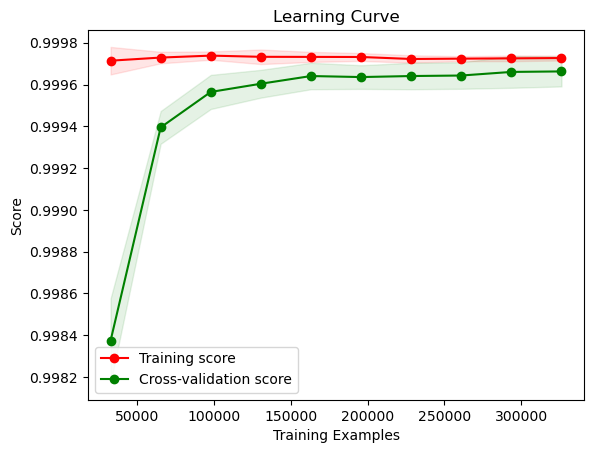

Accuracy : 0.943
Number of unique merchants in the test set:  340
Number of unique merchants in the predicted set:  313
Number of unique merchants in train set:  614
Number of unique merchants in OVERS train set:  614

Number of unique "Transaction Details" rows in test set:  7652
Number of unique "Transaction Details" rows in train set:  1971

Total number of rows in the train set:  8000
Total number of rows in the test set 2000
Train accuracy: 0.99825
Test accuracy: 0.943


Percentage of best precision 60.8

Percentage of best recall 66.93333333333334

Percentage of best f1score 55.46666666666666



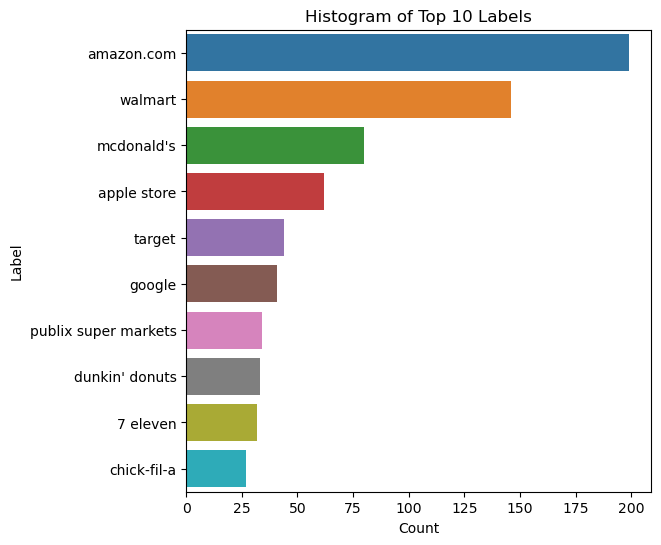

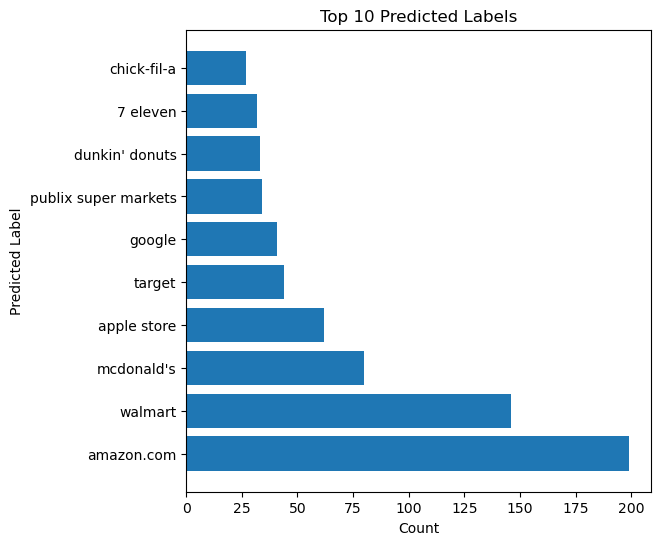

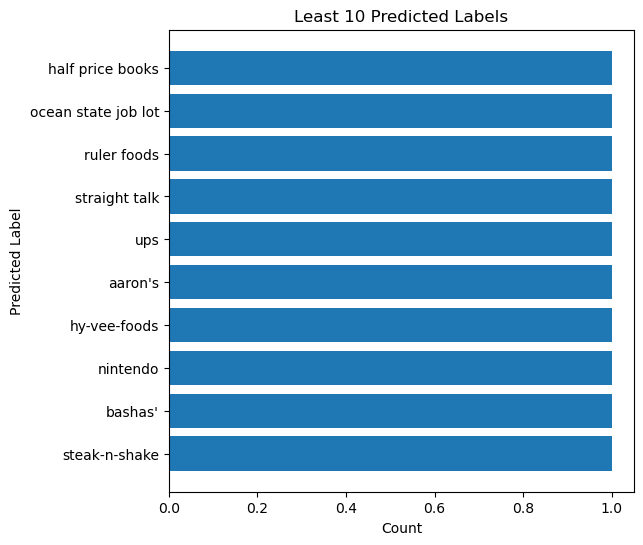

amazon.com: 199
walmart: 146
mcdonald's: 80
apple store: 62
target: 44
google: 41
publix super markets: 34
dunkin' donuts: 33
7 eleven: 32
chick-fil-a: 27


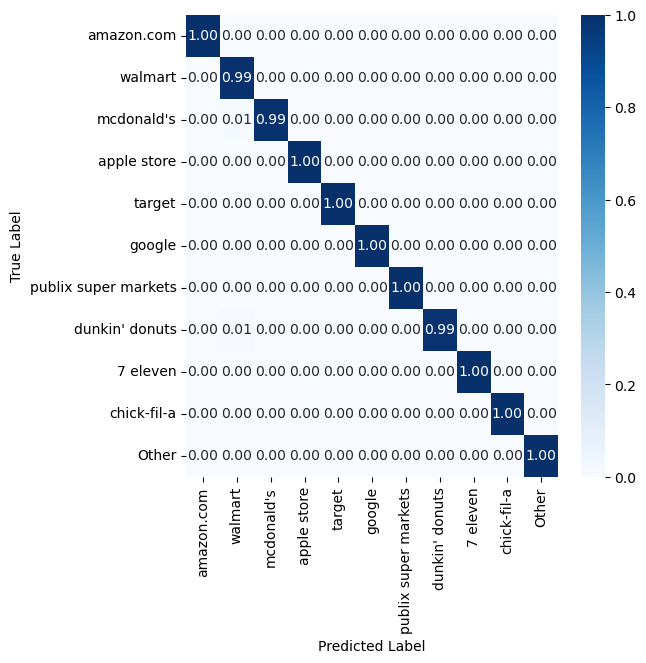

c:\Users\Olimpio.Dasilva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Olimpio.Dasilva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Olimpio.Dasilva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Olimpio.Dasilva\Anaconda

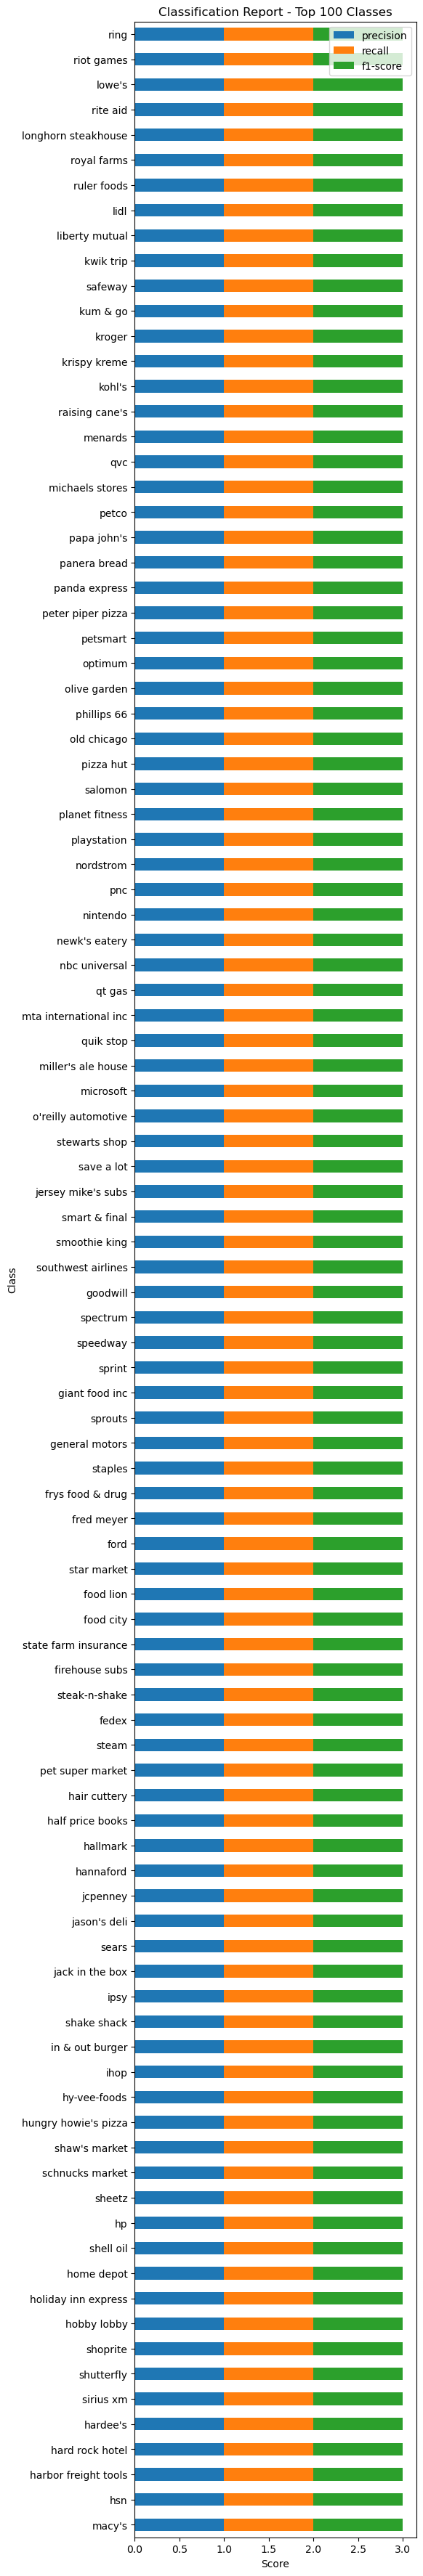



                                precision    recall  f1-score   support

                1-800-flowers       0.00      0.00      0.00         0
                     7 eleven       1.00      1.00      1.00        32
                99-cents-only       1.00      1.00      1.00         1
                      aaron's       0.00      0.00      0.00         0
                 acme markets       1.00      1.00      1.00         5
        adt security services       1.00      1.00      1.00         1
              advance america       0.00      0.00      0.00         1
           advance auto parts       1.00      0.50      0.67         2
                   albertsons       1.00      1.00      1.00         4
                         aldi       1.00      1.00      1.00        14
                     allstate       1.00      1.00      1.00         3
                 amazon prime       0.78      1.00      0.88         7
                   amazon.com       1.00      0.99      0.99       201
  

c:\Users\Olimpio.Dasilva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Olimpio.Dasilva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Olimpio.Dasilva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Olimpio.Dasilva\Anaconda

In [81]:
from sklearn.svm import LinearSVC

classifier2 = Pipeline([('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english') + list(string.punctuation))), #('scaler', StandardScaler(with_mean=False)),
                        ('classifier', LinearSVC(C=1.0))])

result_test = train(classifier2, df_known_class_pred['TRANSACTION_DETAILS'], df_known_class_pred['AFS_MECHANT_NAMES'])

SVC = cls_acc
Stime = cls_time
# print("\n\nSVC: ", SVC)
# print("Time: ", Stime)


In [82]:
result_test.head(100)

,TRANSACTION_DETAILS,AFS_MECHANT_NAMES,PREDICTIONS
7653,debit card debit %%%%% auth 02-13-2023 amazon payments seattle wa,amazon.com,amazon.com
7865,withdrawal debit card %%%%% harkins santan village gilbert az date 06/08/22 00548 7832,harkins,five below
3226,withdrawal debit mcdonald's %%%%% f38647 orlando flus,mcdonald's,mcdonald's
5912,withdrawal rite aid 02604 6101 %%%%% north broad street philadelphia pa %% card 25 0598 00,rite aid,rite aid
8237,ach withdrawal macys - online %%%%% pmt,macy's,macy's
...,...,...,...
896,pos starbucks 800 782 7seattle %%%%% waus,starbucks,starbucks
663,pos withdrawal (fip) dollartre %%%%% 500 r dollartre 500 route south dennis ma(7413),dollar tree,dollar tree
1744,withdrawal pfcu check card %%%%% comcast 800-comcast nj date 02/22/23 40452 4899 %% card 25 3655,comcast,comcast
1102,point of sale withdrawal %%%%% samsclub 8123 evansville in us,sam's club,sam's club


In [83]:
df_result_test = pd.DataFrame(result_test)

In [84]:
result_csv = df_result_test.head(200)

In [85]:
result_csv

,TRANSACTION_DETAILS,AFS_MECHANT_NAMES,PREDICTIONS
7653,debit card debit %%%%% auth 02-13-2023 amazon payments seattle wa,amazon.com,amazon.com
7865,withdrawal debit card %%%%% harkins santan village gilbert az date 06/08/22 00548 7832,harkins,five below
3226,withdrawal debit mcdonald's %%%%% f38647 orlando flus,mcdonald's,mcdonald's
5912,withdrawal rite aid 02604 6101 %%%%% north broad street philadelphia pa %% card 25 0598 00,rite aid,rite aid
8237,ach withdrawal macys - online %%%%% pmt,macy's,macy's
...,...,...,...
408,external withdrawal %%%%% progressivelease pmts,progressive,progressive
3975,withdrawal instant issue %%%%% swa inflight wifi 800-435-9792 ca date 07/14/22 0 9579 3 4816 %% card 10 7177,southwest airlines,southwest airlines
5759,purchase amoco 3max's at %%%%% htopeka ksus,bp amoco,bp amoco
3901,withdrawal mcsignature %%%%% dairy queen store 195 murrysville pa date 09/01/22 36945 5814 %% card 19 8005,dairy queen,dairy queen


In [86]:
# save the dataframe to a CSV file
result_csv.to_csv('result_csv_2.csv', index=False)

In [87]:
# # call function to train and predict using the iris dataset
# predicted_df = train_and_predict(iris, 'class')

# # display the resulting dataframe
# predicted_df.head()

In [88]:
import pandas as pd
pd.set_option('display.max_rows', 200)

In [89]:
result_csv.head(100)

,TRANSACTION_DETAILS,AFS_MECHANT_NAMES,PREDICTIONS
7653,debit card debit %%%%% auth 02-13-2023 amazon payments seattle wa,amazon.com,amazon.com
7865,withdrawal debit card %%%%% harkins santan village gilbert az date 06/08/22 00548 7832,harkins,five below
3226,withdrawal debit mcdonald's %%%%% f38647 orlando flus,mcdonald's,mcdonald's
5912,withdrawal rite aid 02604 6101 %%%%% north broad street philadelphia pa %% card 25 0598 00,rite aid,rite aid
8237,ach withdrawal macys - online %%%%% pmt,macy's,macy's
3004,withdrawal debit google %%%%% minecraft 855-836-3987 caus,google,google
5736,withdrawal debit card %%%%% mcdonald's f7712 rio rancho nm date 10/30/22 29491 5814 card 9270 merchant category code: 5814,mcdonald's,mcdonald's
8290,withdrawal 7-eleven 38295 hwy %%%%% 342 fm 2377 red oak tx %% card 15 8913,7 eleven,7 eleven
9946,point of sale withdrawal %%%%% coldstone 801 louisville ky us,coldstone creamery,coldstone creamery
7295,withdrawal debit card %%%%% withdrawal steak-n-shake 0501 st clairsvill oh,steak-n-shake,steak-n-shake


In [90]:
df_known_class_pred

,transaction_id,TRANSACTION_DETAILS,AFS_MECHANT_NAMES
0,Tcd172d9363d63ef7b06f546fc1fbf88e,wawa 5243 cutler bay %%%%% flus : pos transaction,wawa
1,Td0ede472baa938b7bcbf300a354361b2,vzwrlss bill pay ve 800- 4 ca c 6838 %%%%% nan,verizon wireless
2,T1180359a9f853ae2a6720fcea4f0ecda,withdrawal pos %%%%% amazon.com zy1vh8oc3 seattle wa,amazon.com
3,Tdcb8cb28b7013001a7066a59e169d294,dbt purchase on 12/17 18:22 %%%%% amazon.com 324cv8om3 amzn.com/bill wa card nbr: -3442,amazon.com
4,Tc3a3ca3cbd73360a9d7b078a5d8a88bd,debit card debit %%%%% auth 11-19-2022 7-eleven 27335 essex md,7 eleven
...,...,...,...
9995,T846eefe1cebb352a9ee12f1bf395d4ce,debit card %%%%% amzn mktp us 5r5g82fa3 amzn.com/bill wa date 01/16/23 31220 5942,amazon.com
9996,T7e31ed22394535a7b420efd8ea396da0,descriptive withdrawal bill pay %%%%% citi card,citigroup
9997,Td176838c1d0d3e53b178e7ca36278764,withdrawal consumer debit %%%%% dunkin 72 w main street 6637 date 07/13/22 0 626 0 5814 %% card 15 9028,dunkin' donuts
9998,T2770d6f2d57a3a228638ee78af7dba63,withdrawal instant issue %%%%% costco whse 0671 hawthorne ca date 11/23/21 0 7637 0 5300 %% card 10 2400,costco


In [91]:
result_csv["LEN_WORDS"] = result_csv["TRANSACTION_DETAILS"].apply(lambda x: len(str(x).split()))

C:\Users\Olimpio.Dasilva\AppData\Local\Temp\ipykernel_21136\239869465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_csv["LEN_WORDS"] = result_csv["TRANSACTION_DETAILS"].apply(lambda x: len(str(x).split()))


In [92]:
result_csv["LEN_WORDS"].describe()

count    200.00000
mean      11.42500
std        4.36919
min        5.00000
25%        8.00000
50%       10.00000
75%       13.25000
max       34.00000
Name: LEN_WORDS, dtype: float64

In [93]:
result_csv

,TRANSACTION_DETAILS,AFS_MECHANT_NAMES,PREDICTIONS,LEN_WORDS
7653,debit card debit %%%%% auth 02-13-2023 amazon payments seattle wa,amazon.com,amazon.com,10
7865,withdrawal debit card %%%%% harkins santan village gilbert az date 06/08/22 00548 7832,harkins,five below,13
3226,withdrawal debit mcdonald's %%%%% f38647 orlando flus,mcdonald's,mcdonald's,7
5912,withdrawal rite aid 02604 6101 %%%%% north broad street philadelphia pa %% card 25 0598 00,rite aid,rite aid,16
8237,ach withdrawal macys - online %%%%% pmt,macy's,macy's,7
3004,withdrawal debit google %%%%% minecraft 855-836-3987 caus,google,google,7
5736,withdrawal debit card %%%%% mcdonald's f7712 rio rancho nm date 10/30/22 29491 5814 card 9270 merchant category code: 5814,mcdonald's,mcdonald's,19
8290,withdrawal 7-eleven 38295 hwy %%%%% 342 fm 2377 red oak tx %% card 15 8913,7 eleven,7 eleven,15
9946,point of sale withdrawal %%%%% coldstone 801 louisville ky us,coldstone creamery,coldstone creamery,10
7295,withdrawal debit card %%%%% withdrawal steak-n-shake 0501 st clairsvill oh,steak-n-shake,steak-n-shake,10


In [94]:
# from sklearn.linear_model import SGDClassifier

# classifier = Pipeline([
#     ('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english') + list(string.punctuation))),
#     ('scaler', StandardScaler(with_mean=False)),
#     ('classifier', SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=1000, tol=1e-3)),
# ])

# train(classifier, df_known_class_pred['TRANSACTION_DETAILS'], df_known_class_pred['AFS_MECHANT_NAMES'])

- K-Nearest Neighbors

In [95]:
# from sklearn.neighbors import KNeighborsClassifier

# classifier4 = Pipeline([('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english') + list(string.punctuation))),
#                         ('classifier', KNeighborsClassifier(n_neighbors=5))])

# train(classifier4, df_known_class_pred['TRANSACTION_DETAILS'], df_known_class_pred['AFS_MECHANT_NAMES'])

# KNN = cls_acc
# Ktime = cls_time
# print("\n\nKNN: ", KNN)
# print("Time: ", Ktime)


# Payment Agents VS Merchant Names
- Selected known payment agents
- Checked number of total occurences per agents
- Checked total number of payment agents
- Checked number of transactions with known payment agents
- Defined a function compare payment agents with merchant names
- Created CHECK_MERCH_AGTS to check when agents and merchants are same
- Checked Totals for different situations

In [96]:
df_known_payment_agents = df_known_merchs.copy(deep=True)
# Known payment agent names
df_known_payment_agents = df_known_payment_agents.loc[df_known_payment_agents['AFS_PAYMENT_AGENTS'] != 'Unknow Payment Agent']
df_known_payment_agents

,transaction_id,TRANSACTION_DETAILS,LEN_WORDS,LEN_TOKENS,AFS_PAYMENT_AGENTS,AFS_MECHANT_NAMES,CHECK_MERCH_TRA
21,T087501d8bcb0304aae3bd1fb45221d31,POS Transaction %%%%% GOOGLE *King g.co/helppay# CAUS,7,13.25,GOOGLE,GOOGLE,True
104,T8f9f80514d52310a91fa1e4889dcc23d,Card purchase %%%%% PAYPAL *UBER 4121 (2022-11-24) 402-935-7733 CA *01,10,17.50,PAYPAL,UBER,True
174,T4c2e0b4cd6bd3c99a93dc80969a0dd61,Withdrawal PFCU CHECK CARD %%%%% GRUBHUBTACOBELL GRUBHUB.COM NY Date 01/03/23 ***08772 5812 %% Card 25 #3010,16,27.00,GRUBHUB.COM,GRUBHUB.COM,True
183,T65909725721e3cef9e8df9d0e00deaf4,POS Withdrawal INSTACART*ALDI %%%%% HTTPSINSTACAR CAUS,6,13.50,INSTACART,ALDI,True
255,T1dc302626443360a8817583ae91e7afb,POS Transaction %%%%% DOORDASH*BOB EVANS WWW.DOORDASH. CAUS,7,14.75,DOORDASH,BOB EVANS,True
...,...,...,...,...,...,...,...
9913,T8d9ff27b4249332dae5c94a6fdb8f680,Card purchase %%%%% AMZN Mktp US*SQ2TH8X43 5942 (2022-12-13) Amzn.com/bill WA,10,19.25,SQUARE,AMAZON.COM,True
9917,T2205eeeddfb7330fb12d6b8a0baa76a6,Withdrawal VISA CHECK CARD %%%%% DOORDASH*CHICK-FIL-A WWW.DOORDASH. CA Date 12/13/22 ***92900 5812 %% Card 15 #8013,16,28.75,DOORDASH,CHICK-FIL-A,True
9931,Td7abd7a949cc333192f9b809d546192a,DEBIT CARD DEBIT %%%%% 02-20-2023 GOOGLE *Peacock 855-836-3987 CA *,10,16.75,GOOGLE,GOOGLE,True
9940,Tb69abc00ff113117aaf451d2e4180f8a,Point Of Sale Withdrawal %%%%% PRICELN*SPIRIT AIRLINE 800-774-2354 CT,9,17.25,PRICELINE,SPIRIT AIRLINES,True


In [97]:
print('Number of total occurences per payment agents:\n', (df_known_payment_agents.AFS_PAYMENT_AGENTS).value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

Number of total occurences per payment agents:
 GOOGLE             33.1%
PAYPAL             24.2%
DOORDASH           13.1%
APPLE CASH          6.6%
ROKU                5.4%
GRUBHUB.COM         4.5%
SQUARE              4.2%
OLO                 3.9%
INSTACART           2.7%
SQUARE CASH APP     1.2%
PRICELINE           0.6%
SEAMLESS.COM        0.3%
LEVELUP             0.3%
Name: AFS_PAYMENT_AGENTS, dtype: object


In [98]:
print('Total number of payment agents:\n',len(df_known_payment_agents.AFS_PAYMENT_AGENTS.unique()))

Total number of payment agents:
 13


In [99]:
print('Number of transactions with known payment agents:\n',len(df_known_payment_agents))

Number of transactions with known payment agents:
 335


In [100]:
# Function to compare payment agent names with merchant names
def compare_occurences(agent, merchant):
    agent = agent.split()
    merchant = merchant.split()
    # Conditions to check if words are in transaction strings
    if (merchant in agent or agent in merchant or
        (any(item in merchant for item in agent)) or
        (merchant[:3] in agent)):
        return True
    else:
        return False

In [101]:
# Checking if merchant names and payment agents are same
df_known_payment_agents['CHECK_MERCH_AGTS'] = df_known_payment_agents.apply(lambda x: compare_occurences(x.AFS_MECHANT_NAMES, x.AFS_PAYMENT_AGENTS), axis=1)
df_known_payment_agents.head()

,transaction_id,TRANSACTION_DETAILS,LEN_WORDS,LEN_TOKENS,AFS_PAYMENT_AGENTS,AFS_MECHANT_NAMES,CHECK_MERCH_TRA,CHECK_MERCH_AGTS
21,T087501d8bcb0304aae3bd1fb45221d31,POS Transaction %%%%% GOOGLE *King g.co/helppay# CAUS,7,13.25,GOOGLE,GOOGLE,True,True
104,T8f9f80514d52310a91fa1e4889dcc23d,Card purchase %%%%% PAYPAL *UBER 4121 (2022-11-24) 402-935-7733 CA *01,10,17.50,PAYPAL,UBER,True,False
174,T4c2e0b4cd6bd3c99a93dc80969a0dd61,Withdrawal PFCU CHECK CARD %%%%% GRUBHUBTACOBELL GRUBHUB.COM NY Date 01/03/23 ***08772 5812 %% Card 25 #3010,16,27.00,GRUBHUB.COM,GRUBHUB.COM,True,True
183,T65909725721e3cef9e8df9d0e00deaf4,POS Withdrawal INSTACART*ALDI %%%%% HTTPSINSTACAR CAUS,6,13.50,INSTACART,ALDI,True,False
255,T1dc302626443360a8817583ae91e7afb,POS Transaction %%%%% DOORDASH*BOB EVANS WWW.DOORDASH. CAUS,7,14.75,DOORDASH,BOB EVANS,True,False


- Checked how many times merchant names and payment agents are same
- Checked how many time merchant names and payment agents are different
- Checked total number of transactions with known agents

In [102]:
print('Same merchant names and payment agents:\n',len(df_known_payment_agents.loc[df_known_payment_agents['CHECK_MERCH_AGTS']==True]))

Same merchant names and payment agents:
 148


In [103]:
print('Merchant names and payment agents are diferent:\n',len(df_known_payment_agents.loc[df_known_payment_agents['CHECK_MERCH_AGTS']==False]))

Merchant names and payment agents are diferent:
 187


In [104]:
print('Number of rows with known Agents:\n',len(df_known_payment_agents))

Number of rows with known Agents:
 335


In [105]:
df_known_payment_agents

,transaction_id,TRANSACTION_DETAILS,LEN_WORDS,LEN_TOKENS,AFS_PAYMENT_AGENTS,AFS_MECHANT_NAMES,CHECK_MERCH_TRA,CHECK_MERCH_AGTS
21,T087501d8bcb0304aae3bd1fb45221d31,POS Transaction %%%%% GOOGLE *King g.co/helppay# CAUS,7,13.25,GOOGLE,GOOGLE,True,True
104,T8f9f80514d52310a91fa1e4889dcc23d,Card purchase %%%%% PAYPAL *UBER 4121 (2022-11-24) 402-935-7733 CA *01,10,17.50,PAYPAL,UBER,True,False
174,T4c2e0b4cd6bd3c99a93dc80969a0dd61,Withdrawal PFCU CHECK CARD %%%%% GRUBHUBTACOBELL GRUBHUB.COM NY Date 01/03/23 ***08772 5812 %% Card 25 #3010,16,27.00,GRUBHUB.COM,GRUBHUB.COM,True,True
183,T65909725721e3cef9e8df9d0e00deaf4,POS Withdrawal INSTACART*ALDI %%%%% HTTPSINSTACAR CAUS,6,13.50,INSTACART,ALDI,True,False
255,T1dc302626443360a8817583ae91e7afb,POS Transaction %%%%% DOORDASH*BOB EVANS WWW.DOORDASH. CAUS,7,14.75,DOORDASH,BOB EVANS,True,False
...,...,...,...,...,...,...,...,...
9913,T8d9ff27b4249332dae5c94a6fdb8f680,Card purchase %%%%% AMZN Mktp US*SQ2TH8X43 5942 (2022-12-13) Amzn.com/bill WA,10,19.25,SQUARE,AMAZON.COM,True,False
9917,T2205eeeddfb7330fb12d6b8a0baa76a6,Withdrawal VISA CHECK CARD %%%%% DOORDASH*CHICK-FIL-A WWW.DOORDASH. CA Date 12/13/22 ***92900 5812 %% Card 15 #8013,16,28.75,DOORDASH,CHICK-FIL-A,True,False
9931,Td7abd7a949cc333192f9b809d546192a,DEBIT CARD DEBIT %%%%% 02-20-2023 GOOGLE *Peacock 855-836-3987 CA *,10,16.75,GOOGLE,GOOGLE,True,True
9940,Tb69abc00ff113117aaf451d2e4180f8a,Point Of Sale Withdrawal %%%%% PRICELN*SPIRIT AIRLINE 800-774-2354 CT,9,17.25,PRICELINE,SPIRIT AIRLINES,True,False
